# 4.2.3 [Other Clustering Methods](https://courses.thinkful.com/data-201v1/project/4.2.3)

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. 
1. Set up atleast 3 blob configurations
    * Number of blobs: increase/decrese the # of blobs
    * Blob Distance: set blobs closer/further apart
2. Run the 4 model methodes
    * K-means, mean shift, spectral clustering and affinity propogation on each one

Deliverable: report discussing what was learning about the clustering methods based on their relative performance. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth

%matplotlib inline

There are a *lot* of different clustering methods – we're going to review just three more here: _Mean-shift_, _Spectral Clustering_, and _Affinity Propagation_.  If you want to go even broader, check out this [comparison among all the clustering algorithms available in sklearn](http://scikit-learn.org/stable/modules/clustering.html).

For all three methods, we'll be using the same simulated dataset, with three "blobs."  We won't need to normalize the data since it is simulated and comes pre-normalized, but with real data normalization will be important to make sure all your features are given equal weight in finding a clustering solution.

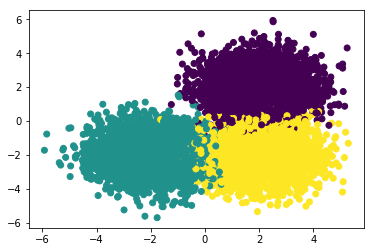

In [2]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

# Mean-shift


Number of estimated clusters: 3


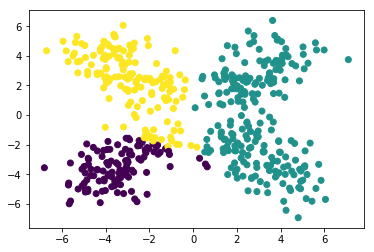

Comparing the assigned categories to the ones in the data:
col_0   0   1   2
row_0            
0       0  63   2
1      38   0  25
2       2  63   1
3       0   1  52
4       0  47   0
5       0   0  70
6       0  59   0
7      77   0   0


In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

___
## Spectral clustering


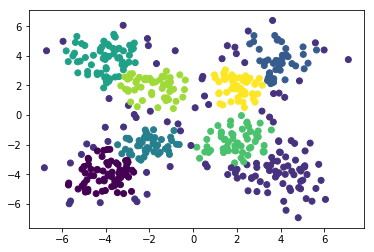

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3   4   5   6   7
row_0                                
0       0  11   6   0   0   1   2  45
1       4  11   0  45   0   1   2   0
2       0  12   0   1   0  52   0   1
3       0   7   0   0   4   0  42   0
4       0   8  37   0   0   0   0   2
5       0   6   0   0  59   0   5   0
6       0  56   0   0   0   3   0   0
7      65  10   0   2   0   0   0   0


In [10]:
from sklearn.cluster import SpectralClustering

# We know we're looking for 8 clusters.
n_clusters=8

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

The 8 blobs look familiar although there is a significant number of peripheray datapoints that were not classified.

_____
# Spectral Clustering

In [8]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 17


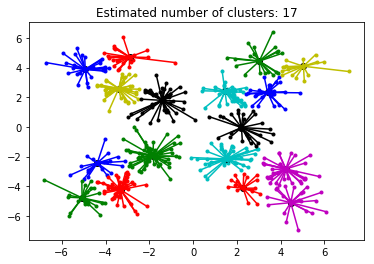

In [11]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

overguessed number of cluster like ther previous affinity function did

# Move Clusters Farther Apart

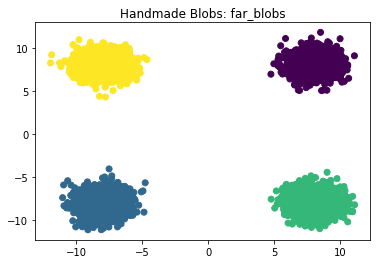


--------------------

MEAN SHIFT
Number of estimated clusters, far_blobs: 4


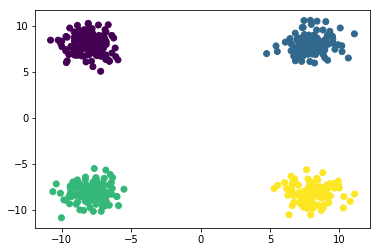

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  128    0    0
1        0    0  119    0
2        0    0    0  117
3      136    0    0    0

--------------------

SPECTRAL CLUSTERING


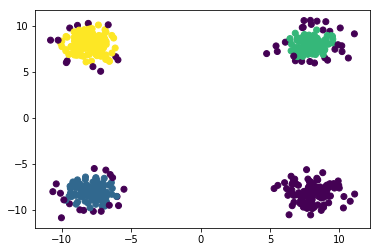

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0       27    0  101    0
1       18  101    0    0
2      117    0    0    0
3       12    0    0  124

--------------------

AFFINITY PROPOGATION
Done
Estimated number of clusters: 4


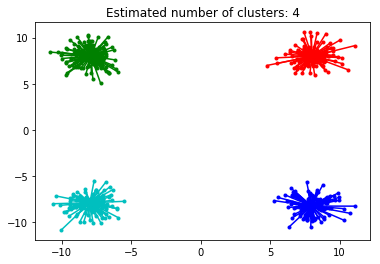

Done
Estimated number of clusters: 4


In [18]:
# Move Clusters Farther Apart
# The coordinates of the centers of our blobs.
centers = [[8, 8], [-8, -8], [8, -8], [-8,8]]
blob_change = 'far_blobs'
# Make 10,000 rows worth of data with two features representing 6 blobs
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=5000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Handmade Blobs: {}'.format(blob_change))
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.9,
    random_state=42)
#________
####################
#### MEAN SHIFT ####
###################
print('\n--------------------')
print('\nMEAN SHIFT')
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters, {}: {}".format(blob_change, n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

###########################
### SPECTRAL CLUSTERING ###
###########################
print('\n--------------------')
print('\nSPECTRAL CLUSTERING')

# We know we're looking for 8 clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#############################
### AFFINITY PROPOGATION ####
#############################
print('\n--------------------')
print('\nAFFINITY PROPOGATION')
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Mean-Shift: Had a really easy time of it.  
Spectral: Struggled with outer datapoints.  
Affinity: Did a much better job than 4 clusters close and 8 clusters close

____
### Increase number of blobs to 8

Mean-Shift: Blended the closer blobs with the farther blobs, ended up with just 3 blobs instead of 8
Spectral: Struggled with outer datapoints.  
Affinity: Did a much better job than 4 clusters close and 8 clusters close

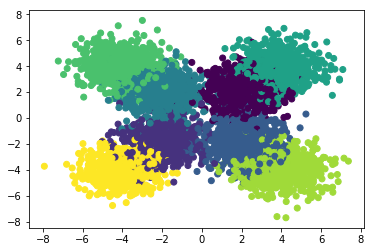

MEAN SHIFT
Number of estimated clusters, 8blob: 3


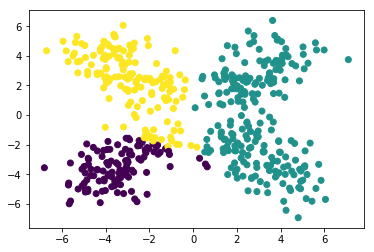

Comparing the assigned categories to the ones in the data:
col_0   0   1   2
row_0            
0       0  63   2
1      38   0  25
2       2  63   1
3       0   1  52
4       0  47   0
5       0   0  70
6       0  59   0
7      77   0   0
/nSPECTRAL CLUSTERING


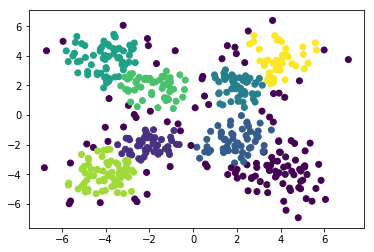

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3   4   5   6   7
row_0                                
0      11   0   1  45   0   2   0   6
1      11  45   1   0   0   2   4   0
2      13   1  51   1   0   0   0   0
3       7   0   0   0   4  42   0   0
4       7   0   0   2   0   0   0  38
5       6   0   0   0  59   5   0   0
6      57   0   2   0   0   0   0   0
7       9   2   0   0   0   0  66   0
AFFINITY PROPOGATION
Done
Estimated number of clusters: 17


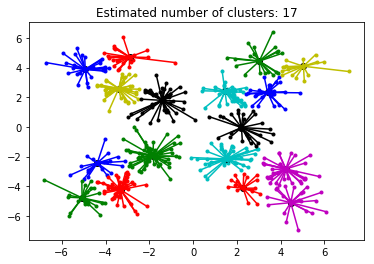

Done
Estimated number of clusters: 17


In [15]:
# Increase number of blobs
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2,2], [4,4], [-4,4], [4,-4],[-4,-4]]
blob_change = '8blob'
# Make 10,000 rows worth of data with two features representing 6 blobs
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=5000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.9,
    random_state=42)
#________
####################
#### MEAN SHIFT ####
###################
print('\nMEAN SHIFT')
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters, {}: {}".format(blob_change, n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

###########################
### SPECTRAL CLUSTERING ###
###########################
print('\nSPECTRAL CLUSTERING')
# We know we're looking for 8 clusters.
n_clusters=8

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#############################
### AFFINITY PROPOGATION ####
#############################
print('\nAFFINITY PROPOGATION')
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


## Increase number of blobs but farther away

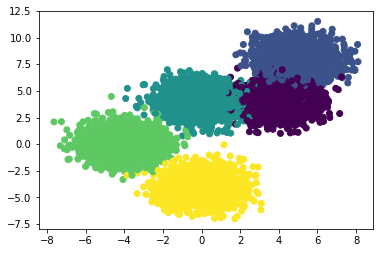


MEAN SHIFT
Number of estimated clusters, 5blob: 3


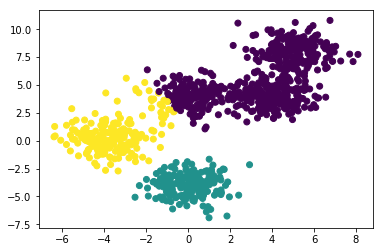

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      221    0    0
1      203    0    0
2      163    0   28
3        0    0  187
4        0  196    2

SPECTRAL CLUSTERING


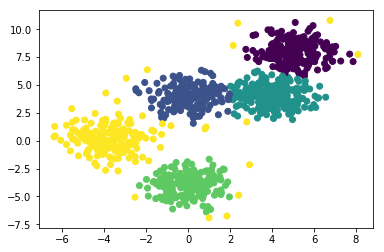

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        1    5  214    0    1
1      194    0    5    0    4
2        0  179    5    0    7
3        0    0    0    0  187
4        0    0    0  191    7

AFFINITY PROPOGATION
Done
Estimated number of clusters: 102


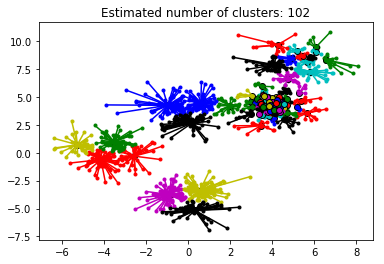

Done
Estimated number of clusters: 102


In [22]:
# Increase number of blobs but scatter better
# The coordinates of the centers of our blobs.
centers = [[4, 4], [5, 8], [0,4], [-4,0] , [0,-4]]
blob_change = '5blob'
# Make 10,000 rows worth of data with two features representing 6 blobs
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.9,
    random_state=42)
#________
####################
#### MEAN SHIFT ####
###################
print('\nMEAN SHIFT')
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters, {}: {}".format(blob_change, n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

###########################
### SPECTRAL CLUSTERING ###
###########################
print('\nSPECTRAL CLUSTERING')
# We know we're looking for 8 clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#############################
### AFFINITY PROPOGATION ####
#############################
print('\nAFFINITY PROPOGATION')
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
